# 11. 机器学习

## 矩阵

In [24]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.animation import FuncAnimation
from sklearn.datasets import fetch_openml
import pickle

dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [2]:
with open('logistic_regression.model', 'rb') as f:
    model_r = pickle.load(f)

with open('w.model', 'rb') as f:
    w_r = pickle.load(f)

with open('b.model', 'rb') as f:
    b_r = pickle.load(f)

print('pickle read finished')

In [60]:
with open('boston_labels', 'rb') as f:
    labels_r = pickle.load(f)

true_labels, predicated_labels, losses = labels_r[0], labels_r[1], labels_r[2]

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(true_labels, predicated_labels)

array([[71,  4],
       [ 7, 18]])

In [50]:
??confusion_matrix

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Source:   
@validate_params(
    {
        "y_true": ["array-like"],
        "y_pred": ["array-like"],
        "labels": ["array-like", None],
        "sample_weight": ["array-like", None],
        "normalize": [StrOptions({"true", "pred", "all"}), None],
    },
    prefer_skip_nested_validation=True,
)
def confusion_matrix(
    y_true, y_pred, *, labels=None, sample_weight=None, normalize=None
):
    """Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.


In [57]:
len(losses)

200

In [21]:
from sklearn.metrics import roc_curve, auc

In [61]:
fpr, tpr, thresholds = roc_curve(true_labels, losses)

roc_auc = auc(fpr, tpr)
print('AUC: {}'.format(roc_auc))

AUC: 0.9300356506238858


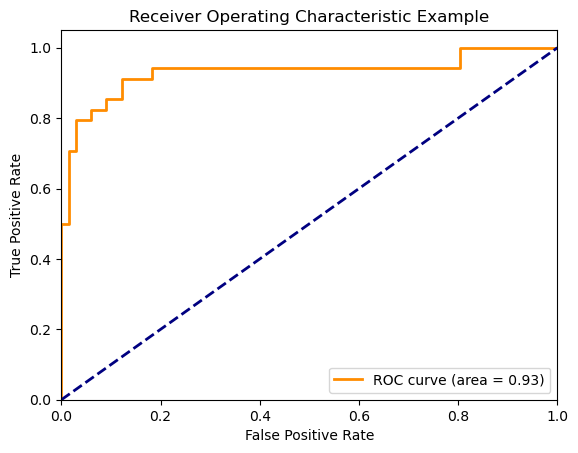

In [62]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc='lower right')
plt.show()

![欢迎订阅：坍缩的奇点](../assets/Capture-2023-11-02-164446.png)